In [1]:
from Wind.Private.DBConfig import mongoconnection
from pymongo import MongoClient
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
client = MongoClient(mongoconnection.server)
db = client[mongoconnection.db]
db.authenticate(mongoconnection.user, password=mongoconnection.passwd)
col = db[mongoconnection.col]


In [57]:
def find_exp(query):
    return col.find(query)

def count_exp(query):
    print col.count(query)
    
    
def compare_exp(lexp, n=10):
    
    fig = plt.figure(figsize=(16, 10), dpi=100)

    axes = fig.add_subplot(1, 2, 1)

    ldiff = []
    
    for exp in lexp:
        data = np.array(exp['result'])
        ldiff.append((np.sum(data[:,1]), exp))
        axes.plot(data[:,0], data[:,1])

    
    besta = [b[1] for b in sorted(ldiff, reverse=True)[:n]]
            
        
    for exp in besta:
        axes = fig.add_subplot(1, 2, 2)
        data = np.array(exp['result'])
        axes.plot(data[:,0], data[:,1], 'r')
        axes.plot(data[:,0], data[:,3], 'b')
            
    return besta

    

In [58]:
query1= {'status':'done', 
             #   'data.lag':32, 
             # 'data.dataset':3, 
               # 'data.vars': [0,1,2,3],
              #  'arch.neurons': 32, 
               # 'arch.drop':0.1,
              #  'arch.rnn':'GRU',
               # 'arch.bidirectional':False,
               # 'arch.activation':'tanh'
               }

In [59]:
count_exp(query1)

675


In [60]:
res1= find_exp(query1)

#print res1['arch']

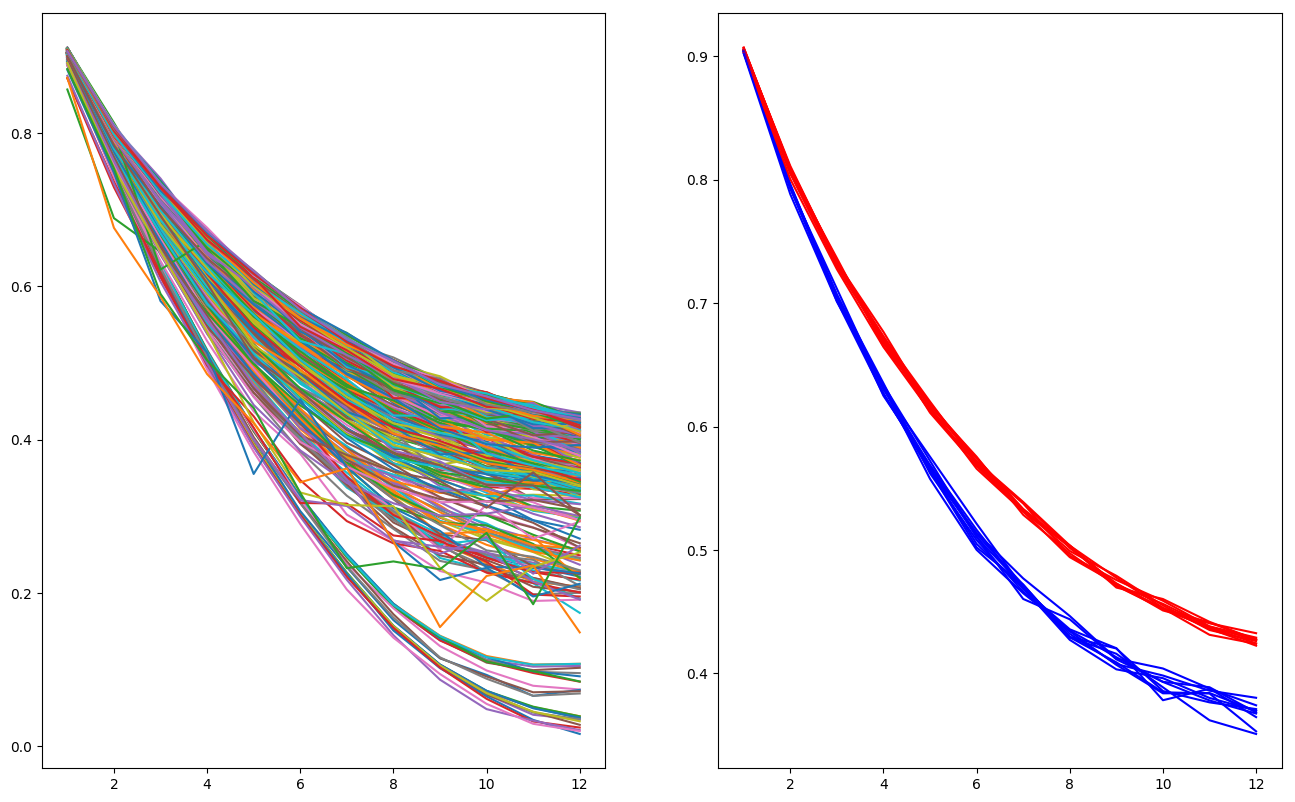

In [61]:
best = compare_exp(res1)

In [62]:
i=0

print(best[i]['_id'])
print(best[i]['data']['dataset'])
print(best[i]['data']['lag'])
print(best[i]['data']['vars'])
print(best[i]['arch']['rnn'])
print(best[i]['arch']['nlayers'])
print(best[i]['arch']['neurons'])
print(best[i]['arch']['drop'])
print(best[i]['arch']['bidirectional'])
print(best[i]['arch']['activation'])
print(best[i]['training']['optimizer'])

print(np.array(best[i]['result'])[:,1])

1522761739
1
16
[0, 1, 2, 3, 4, 5]
GRU
2
96
0.3
False
relu
adamax
[0.90560243 0.81110503 0.73311047 0.6766686  0.61430161 0.57462154
 0.53252527 0.49916389 0.47906754 0.45505093 0.43514533 0.42616868]
